# Exploring Matplotlib and Pyplot

I'm in the first week at the [Metis](https://www.thisismetis.com) [datascience bootcamp](https://www.thisismetis.com/data-science-bootcamps). (Feel free to get in touch if you'd like to chat about it.)

It's great!

And with the amount of time it requires, a quick facility with Matplotlib and pyplot would be a big help.

I . . . don't have that yet.  Figures?  The weird syntax?  **Subplots**?  Th' hell?

I'm going to figure it out.  Come on the journey with me.

## The Basics

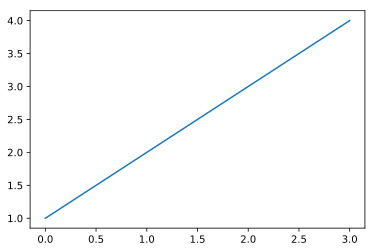

In [196]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.plot([1,2,3,4]);

**BOOM**

But let's break it down a bit.

- The `%matplotlib inline` code is a bit of jupyter notebook magic that displays graphs within the jn without having to call "plt.show()" each time.  (This also helps avoid plotting lines from different graphs in the same graphic.)
>Similarly, `%config InlineBackend.figure_format = 'svg'` is telling jn to use the svg format for graphics (which, when exported, won't pixelate up on you when displayed in a web browser)


- The semicolon at the end of the plt.plot call supresses jn from 'printing' the last line of the cell


- Notice that the main library is a subclass of matplotlib called pyplot that we're importing as its own object.
>It's pyplot (which we imported as plt) that acts as the workhorse graphing tool.  IOW: feed data into pyplot to produce a chart.


- And already there's a "th' hell?" moment: we're only feeding one list of data into pyplot (the y values), and it's automatically providing x values to pair with the y values, but the x values go from 0:3 while our list was from 1:4 . . . ugh.
>What's going on is that, if you feed a single sequence of values to pyplot, it treats it as y values and automatically assigns x values to graph it.  So far so good, but why do the x-values start at 0?

   >Beacuse, recall, python ranges start at 0.

---
---

Ok, this isn't so bad.  Let's add x-values and start playing around with axes.

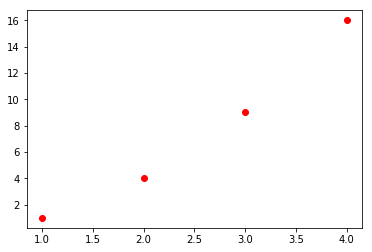

In [137]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro');

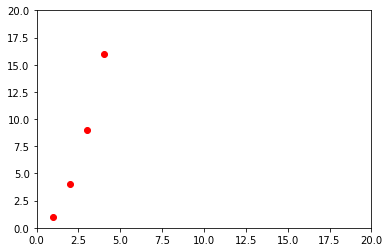

In [142]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.xlim( (0,20) )
plt.ylim( (0,20) );

##### Data
+ Feeding two series of data into pyplot acts as you would hope it would: it takes one series as x values and one series as y values
   
   
+ But notice that, of course, there's a reverse of how it treats a single series of data: the series in the first position is now the **x-values**, and the second series is the **y-values**

###### Colors / Shapes
+ Notice also there's some weird parameter after the series in py.plot  
  + This is the first of many delightful quirks about matplotplib that are due to its origin.  
  + It was designed to mimic the graphing capabilities of Matlab, and originally imported a lot of Matlab's graphing syntax.  


+ So, apparently, Matlab used a string concatenation system to assign colors and shapes to lines
  + The first character in the string assigns the color, and the second character assigns the shape
  + Color options are pretty much what you would expect: 'b' for blue, 'r' for red, 'g' for green, etc.  
  + Shape options are delightfully irrational and hard to memorize: 's' for square, 'o' for circle, '^' for triangle

##### Axes
+ Setting axes is more straightforward
  + two axis methods, plt.xlim and plt.ylim, take tuples as the xmin, xmax and ymin, ymax respectively
  + notice how we were able to exaggerate the shape of a curve by manipulating axes, good to know good to know
  

## Multiple Lines

Let's try plotting multiple series on the same plot

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


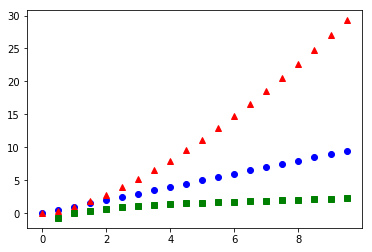

In [141]:
import numpy as np

d = np.arange(0, 10, .5)
plt.plot(d, d, 'bo', d, d**1.5, 'r^', d, np.log(d), 'gs');

Seems like we're getting closer to a syntax that might be regularly useful for at least scratchpad work, right? 

   Notice that pyplot can take multiple line inputs in the form:
   >`plt.plot(line1 x-values, line1 y-values, line1 graphic options, line2 x-values, line2 y-values, line2 graphic options . . . )`

## Pyplot objects

Let's use this graph to see what pyplot is doing 'under the hood'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


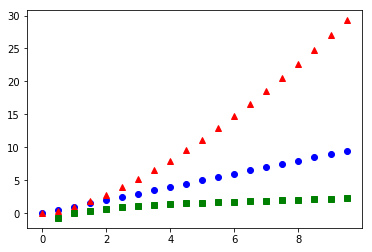

In [157]:
x,y,z = plt.plot(d, d, 'bo', d, d**1.5, 'r^', d, np.log(d), 'gs')

In [154]:
x

In [155]:
y

In [156]:
z

Looks like in addition to graphing, plt.plot() also returns objects for each line.

These objects are called . . . Lines. 

   + Their properties are the properties of the graphed lines
   + These properties are mutable
   + They can be changed (even after the plot is called) with a .setp() method in plt

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


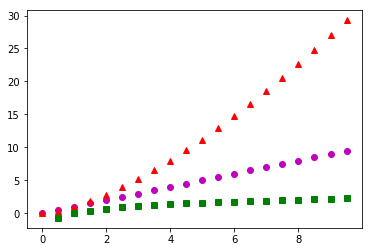

In [163]:
x,y,z = plt.plot(d, d, 'bo', d, d**1.5, 'r^', d, np.log(d), 'gs')

plt.setp(x, color = 'm');

So we can change the properties of a line with plt.setp(specific line, specific property to change)

That's not too bad.  What other objects are there?  Couldn't be too -

Figure(432x288)
AxesSubplot(0.125,0.125;0.775x0.755)


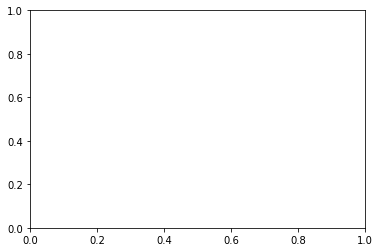

In [172]:
fig, ax = plt.subplots()

print(fig)
print(ax);

___oh noooooo___

## Figures and Subplots

Actually it's not too bad

These are objects that every graphic in pyplot has.  The plt.plot syntax we started with above just hides them.  

(If you're just dashing off a single quick graph for scratchpad exploratory anaylsis, you probably won't need them.)  


But when making multiple charts (or for public consumption) this syntax seems like it'll be necessary to use.

Let's take a look:

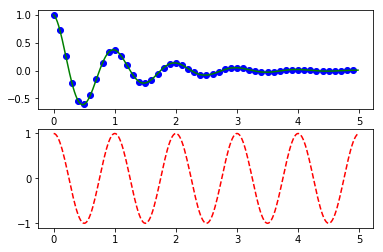

In [180]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)

plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'g')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--');

> The bits before the plt calls should be straightforward to interpret: 
- we're creating arrays from 0 to 5 in steps of .1 and .02
- and a function which takes t and returns $e^{-t} * \cos(2\pi t)$

`plt.figure` creates a 'figure instance', which is both returnable:

In [183]:
x = plt.figure(1)
x;

and stored in memory as the 'location' of the graphic.

> + Unfortunately, this means that if you're working with multiple figures, they have to be individually closed for their memory to be released.

> + The '1' value inside `plt.figure(1)` is just a name separating figure instances (it can be a string too).

`plt.subplot` creates the individual graphics.  The 1's and 2's inside them have a weird Matlab syntax but is pretty straightforward:

  + `plt.subplot(211)` is arranging a plot in a space with 2 rows, 1 column, and is the first entry in the first row
  + `plt.subplot(212)` is arranging a plot space with 2 rows, 1 column, and is the first entry in the first row
  + etc.

These can be switched around:

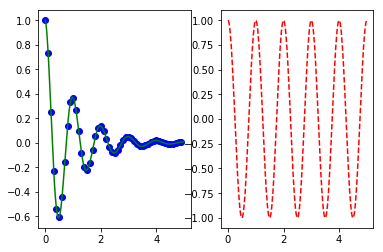

In [184]:
plt.figure(1)

plt.subplot(121)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'g')

plt.subplot(122)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--');

Get it?

But now they're squished together; the axes on the second plot are running into the first graph; dogs and cats are living together, mass hysteria.

We can manipulate the `plt.figure` instance to increase the size in which the plots are displayed (values are in inches; other units can be specified if you want):

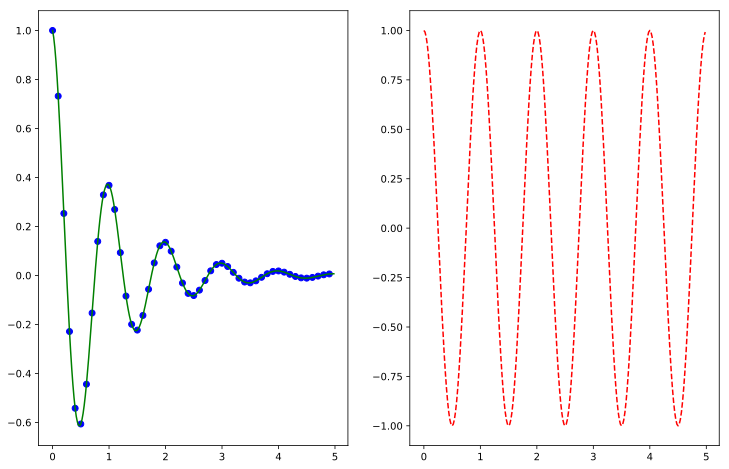

In [199]:
plt.figure(1, figsize = (12.2, 8))

plt.subplot(121)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'g')

plt.subplot(122)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--');

ahhh, nothing like stretching out

## A different syntax using subplot objects

You may have noticed that I mentioned a figure instance being created every time plot is called.  So why are we calling plt.figure specifically?  Shouldn't there be a way to store it as an object for easy retrieval?  Maybe along with an object for a specific plot?

I got you

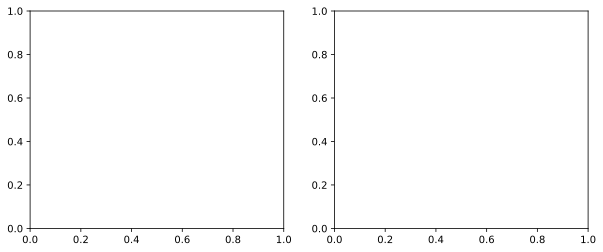

In [247]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

THAT'S RIGHT PEEPS 

There's a method within pyplot called 'subplots' which creates figure and graphics objects.  

These objects themselves now have methods which are able to store the plots we just created.

Can you see the __raw power__ of this syntax?

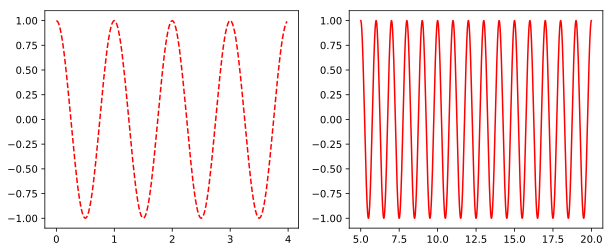

In [246]:
t1 = np.arange(0,4,.02)
t2 = np.arange(5,20,.005)

arrays = [t1, t2]
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

for graphic in [0,1]:
    color = ['--','-']
    x, y, color = (arrays[graphic], np.cos(2*np.pi*arrays[graphic]), 'r{}'.format(color[graphic]))
    ax[graphic].plot(x, y, color)

dynamic.

graph.

construction.

If only (oh if only) the syntax weren't `plt.subplots()` when there's already a `plt.subplot()` running around out there

Can't have everything

## Labels, axes values, adding text / graphics

I'll end my current exploration by adding labels, a title, and some text to the graphs above.  The syntax is all pretty straight-forward.  

Happy plotting, and stay safe out there

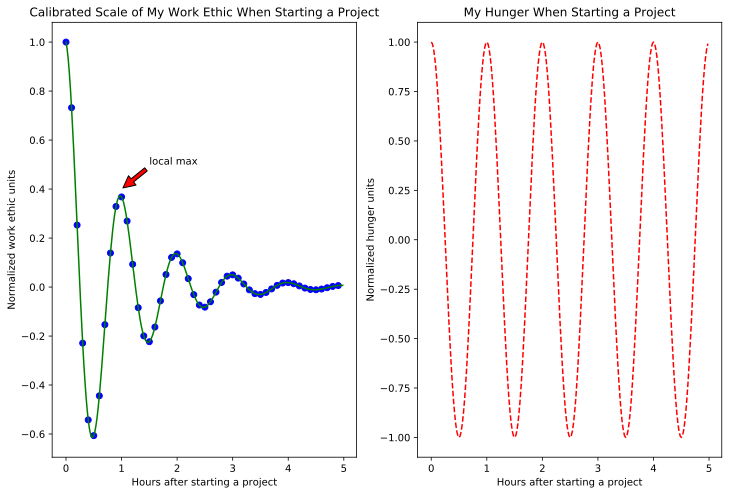

In [256]:
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

fig, ax = plt.subplots(1, 2, figsize = (12, 8))


ax[0].plot(t1, f(t1), 'bo', t2, f(t2), 'g')
ax[0].annotate('local max', xy=(1, .4), xytext=(1.5, .5),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
ax[0].set_xlabel('Hours after starting a project')
ax[0].set_ylabel('Normalized work ethic units')
ax[0].set_title('Calibrated Scale of My Work Ethic When Starting a Project')

ax[1].plot(t2, np.cos(2*np.pi*t2), 'r--')
ax[1].set_xlabel('Hours after starting a project')
ax[1].set_ylabel('Normalized hunger units')
ax[1].set_title('My Hunger When Starting a Project');